In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_value(values, knapsack):
    return sum([values[k] for k in knapsack])

def calculate_weight(weights, knapsack):
    return sum([weights[k] for k in knapsack])

def value_decreasing_solution(weights, values, capacity):
    knapsack = []
    inds = values.argsort()[::-1]
    curr_weight = 0
    for k in inds:
        if (curr_weight + weights[k]) <= capacity:
            knapsack.append(k)
            curr_weight += weights[k]
    return knapsack

def weight_decreasing_solution(weights, capacity):
    knapsack = []
    inds = weights.argsort()[::-1]
    curr_weight = 0
    for k in inds:
        if (curr_weight + weights[k]) <= capacity:
            knapsack.append(k)
            curr_weight += weights[k]
    return knapsack

def optimize_solution(knapsack, values, weights, capacity, iterations):
    old_weight = calculate_weight(weights, knapsack)
    num_items = len(weights)
    pool = [item for item in range(num_items) if item not in knapsack]

    for i in range(iterations):
        if (np.random.randint(0, 2)): #attempt swap
            knapsack_idx = np.random.randint(len(knapsack))
            knapsack_item = knapsack[knapsack_idx]

            pool_idx = np.random.randint(len(pool))
            pool_item = pool[pool_idx]

            value_diff = +values[pool_item] - values[knapsack_item]
            new_weight = old_weight + weights[pool_item] - weights[knapsack_item]
            if value_diff >= 0 and new_weight <= capacity:
                knapsack[knapsack_idx] = pool_item
                old_weight = new_weight
                pool[pool_idx] = knapsack_item

        else: #migrate
            pool_idx = np.random.randint(len(pool))
            pool_item = pool[pool_idx]
            new_weight = old_weight + weights[pool_item]
            if new_weight <= capacity:
                knapsack.append(pool_item)
                old_weight = new_weight
                pool.pop(pool_idx)

    return knapsack

In [3]:
capacity = 30
min_weight, max_weight = 1, 10
min_value, max_value = 10, 50

val_sorted_results = []
weight_sorted_results = []

X = [100, 250, 500, 1000, 1500, 2500, 5000, 8000]

for num_items in X:
    weights = np.random.randint(min_weight, max_weight + 1, num_items)
    values = np.random.randint(min_value, max_value + 1, num_items)
    
    knapsack_val_decreasing = value_decreasing_solution(weights, values, capacity)
    knapsack_weight_decreasing = weight_decreasing_solution(weights, capacity)

    value_decreasing_opt = optimize_solution(knapsack_val_decreasing, values, weights, capacity, iterations=100_000_000)
    weight_decreasing_opt = optimize_solution(knapsack_weight_decreasing, values, weights, capacity, iterations=100_000_000)
    
    val_sorted_results.append(calculate_value(values, value_decreasing_opt))
    weight_sorted_results.append(calculate_value(values, weight_decreasing_opt))


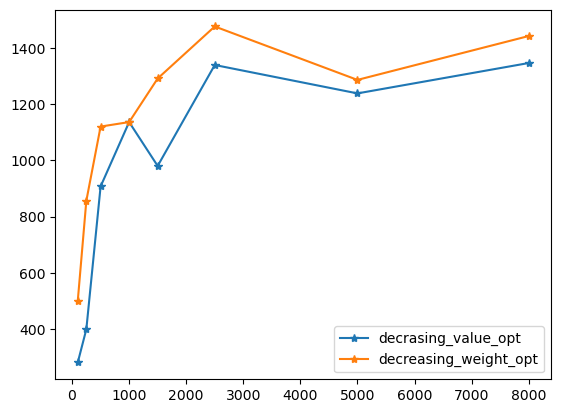

In [4]:
plt.plot(X, val_sorted_results, '*-')
plt.plot(X, weight_sorted_results, '*-')
plt.legend(['decrasing_value_opt','decreasing_weight_opt', 'empty_knapsack_opt'])
plt.show()

I dont have that much to say here, so i am just leaving some thoughts/ideas. I implemented the decreasing-weight and decreasing-value techniques with swap + migration optimization. Straight forward.

Here i use two different strategies for forming the initial solution for the knapsack problem. The only difference between the two methods is how the items are sorted. After initial solutions are generated, an optimization is performed. The optimizer will either swap an item from the back with one outside the bag (randomly), or simply attempt to add an additional item into the knapsack. This decision is made randomly, according to a chosen swap/migration ratio (effetively 0.5 here). The results are plotted for different item counts.

Analysis of the results indicates that prioritizing by weight outperforms value in scenarios with fewer items. However, as item count increases, both strategies seem to plateau. I'm not sure why we this kind plateau behavior. For the runs with a low item count- the "decreasing_weight_opt" seems to perform much much better as a starting solution than decreasing value. I think the reason here is that by sorting by decreasing weight, we end up with a lot of heavy items in the bag as the initial solution. This means that swaps and subseqeuent migrations will usually go through- since the items we are swapping for will almost always be lighter, and will then fit in the backpack. 

If we were to say- put as many items as possible into the bag, sorting by increasing weight, we would find that any later swap in the optimization step would result in the capacity constraint being broken. In this case we might be quite stuck on the initial solution.

It also might be interesting to consider how different weight/value *distributions* affect the performance of different strategies. Maybe if we make some assumptions on what probability distributions the items' weights and values were sampled from, it would help us analyze the strategies? Or maybe we should just benchmark the existing strategies against different distributions, and use this knowledge when choosing a method in the future- if we have some information about the system we are optimizing over.